# Weeks 9 & 10 Exercise

## 1) Data Wrangling with Python: Activity 9, page 294

***Instructions)***

Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup4 to parse the HTML and regular expression code to identify the Top 100 eBook file numbers.

You can use those book ID numbers to download the book into your local drive if you want.

Head over to the supplied Jupyter notebook (in the GitHub repository) to work on this activity.

These are the steps that will help you solve this activity:

1. Import the necessary libraries, including regex and beautifulsoup.
2. Check the SSL certificate.
3. Read the HTML from the URL.
4. Write a small function to check the status of the web request.
5. Decode the response and pass this on to BeautifulSoup for HTML parsing.
6. Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.
7. Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.
8. Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.
9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).
10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).
11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.
12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.
13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.



***Answer)***

**#1. Import Libraries**

In [1]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

**#2. Check the SSL Certificate**

In [2]:
# ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

**#3. Read teh HTML from the URL**

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

**#4. function to check the status of the web request.**

In [4]:
def status_check(r):

    if r.status_code==200:
        print("Success!")
        return 1

    else:
        print("Failed!")
        return -1

In [5]:
status_check(response)

Success!


1

**#5. Decode the response and pass to BeautifulSoup for HTML parsing.**

In [6]:
contents = response.content.decode(response.encoding)

soup = BeautifulSoup(contents, 'html.parser')

**#8. Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.**

In [7]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    # print(link.get('href'))
    lst_links.append(link.get('href'))

In [8]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

**#9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).**

In [9]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-02-20329242
last 7 days2058572
last 30 days7541231



Top 100 EBooks yesterday
T

In [10]:
# initializing the empty list to hold the file numbers of the top 100 books
booknum=[]

#33 - 132 are the where the books are in the original list

In [11]:
for i in range(33,132):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [12]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)

print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[84, 1342, 2701, 1513, 145, 100, 2641, 37106, 64317, 16389, 67979, 6761, 394, 4085, 2160, 11, 6593, 1259, 5197, 2542, 174, 1952, 844, 98, 5200, 2554, 345, 1080, 408, 25344, 73001, 72998, 43, 1260, 1400, 219, 76, 28054, 1232, 72996, 1727, 6130, 1661, 2591, 72999, 3207, 4300, 2000, 205, 41445, 768, 46, 5740, 23, 2814, 72997, 2600, 16, 1184, 1998, 58585, 7370, 1497, 45, 996, 30254, 36, 55, 42324, 514, 16328, 74, 158, 15399, 600, 67098, 2097, 161, 244, 8800, 72995, 4363, 16119, 11030, 36034, 10007, 41, 4217, 3825, 2680, 1399, 2852, 33283, 829, 8492, 35, 120, 5827, 140]


**#10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).**

In [13]:
# Temp empty list of Ebook names
lst_titles_temp=[]

**#11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.**

In [14]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

**12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.**

In [15]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

**#13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.**

In [16]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [17]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
Moby Dick
Romeo and Juliet by William Shakespeare 
Middlemarch by George Eliot 
The Complete Works of William Shakespeare by William Shakespeare 
A Room with a View by E
Little Women
The Great Gatsby by F
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Roderick Random by T
The Expedition of Humphry Clinker by T
Alice
History of Tom Jones
Twenty years after by Alexandre Dumas and Auguste Maquet 
My Life 
A Doll
The Picture of Dorian Gray by Oscar Wilde 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Importance of Being Earnest
A Tale of Two Cities by Charles Dickens 
Metamorphosis by Franz Kafka 
Crime and Punishment by Fyodor Dostoyevsky 
Dracula by Bram Stoker 
A Modest Proposal by Jonathan Swift 
The Souls of Black Folk by W
The Scarlet Letter by Nathaniel Hawthorne 
Rube Burrow
Worth his wh

## 2) Data Wrangling with Python: Activity 10, page 295

***Instructions)***

In this activity, you will build a complete movie database by communicating and interfacing with a free API. You will learn about obtaining a unique user key that must be used when your program tries to access the API. This activity will teach you general chapters about working with an API, which are fairly common for other highly popular API services such as Google or Twitter. Therefore, after doing this exercise, you will be confident about writing more complex programs to scrape data from such services.

The aims of this activity are as follows:

- To retrieve and print basic data about a movie (the title is entered by the user) from the web (OMDb database)
- If a poster of the movie can be found, it downloads the file and saves it at a user-specified location

These are the steps that will help you solve this activity:

1. Import urllib.request, urllib.parse, urllib.error, and json.
2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.
3. Obtain a key and store it in JSON as APIkeys.json.
4. Open the APIkeys.json file.
5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.
6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.
7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).
8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.
9. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.
10. Test the search_movie function by entering Titanic.
11. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).


***Answer)***

**#1. Import urllib.request, urllib.parse, urllib.error, and json.**

In [18]:
import urllib.request, urllib.parse, urllib.error
import json

**#2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.**

I was able to succesfully obtain an api key from omdbapi.com and loaded the api key in a new JSON file.

**#3. Obtain a key and store it in JSON as APIkeys.json.**

I performed this step in a sepearte notebook file and created the JSON file with the API key. However, I will paste the code here without the api key for demonstration purposes.

In [39]:
import json

# defining the data (exluding the actual api key for security)
data = {
    "api_key": "-----"
}

# specifying the JSON file name
filename = 'api_key.json'

In [40]:
# writing the data to a JSON file
with open(filename, 'w') as file:
    json.dump(data, file, indent=4)

**#4. Open the APIkeys.json file.**

This JSON file has my APIkey

In [41]:
with open('api_key.json') as f:
    keys = json.load(f)
    omdbapi = keys['api_key']

**#5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.**

In [42]:
serviceurl = 'http://www.omdbapi.com/?'

**#6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.**

In [43]:
apikey = '&apikey='+omdbapi

**#7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).**

In [44]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer',
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings',
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']    
    print("-"*50)

    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

**#8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.**

In [45]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

**#9. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.**

In [46]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

**#10. Test the search_movie function by entering Titanic.**

I tested it on Titanic first, but then looked up my favorite movie, which is shown below!

In [47]:
search_movie("Blade Runner")

Retrieving the data of "Blade Runner" now... 
http://www.omdbapi.com/?t=Blade+Runner&apikey=e2f1de69
--------------------------------------------------
Title: Blade Runner
Year: 1982
Rated: R
Released: 25 Jun 1982
Runtime: 117 min
Genre: Action, Drama, Sci-Fi
Director: Ridley Scott
Writer: Hampton Fancher, David Webb Peoples, Philip K. Dick
Actors: Harrison Ford, Rutger Hauer, Sean Young
Plot: A blade runner must pursue and terminate four replicants who stole a ship in space and have returned to Earth to find their creator.
Language: English, German, Cantonese, Japanese, Hungarian, Arabic, Korean
Country: United States, United Kingdom
Awards: Nominated for 2 Oscars. 13 wins & 22 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '84/100'}]
Metascore: 84
imdbRating: 8.1
imdbVotes: 814,563
imdbID: tt0083658
--------------------------------------------------


**#11. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).**

In [28]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=-----
ERROR: Unauthorized


## 3) API Data pull

***Instructions)***

Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

- In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter's API for this portion of the assignment, but please note, there has been some inconsistency experienced when following along with their documentation posted.
- Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

***Answer)***

I am using the open Chuck Norris Jokes API

In [29]:
import requests

In [30]:
def print_json(json_data):
    chuck_list_keys = ['icon_url', 'id', 'url', 'value']
    print("-" * 50)

    for k in chuck_list_keys:
        if k in json_data.keys():
            print(f"{k}: {json_data[k]}")
    print("-" * 50)

In [31]:
def search_joke(chosen_category):
    try:
        url = f"https://api.chucknorris.io/jokes/random?category={chosen_category}"
        print(f'Retrieving the data of "{chosen_category}" category now... ')
        print(url)

        response = requests.get(url)
        
        # Check if the request was successful
        if response.status_code == 200:
            json_data = response.json()
            print_json(json_data)
        else:
            print(f"Error encountered: HTTP Status Code {response.status_code}")
    
    except requests.exceptions.RequestException as e:
        print(f"ERROR: {e}")

In [32]:
def print_available_categories():
    url_category_list = "https://api.chucknorris.io/jokes/categories"
    try:
        response = requests.get(url_category_list)
        
        # Check if the request was successful
        if response.status_code == 200:
            category_list = response.json()
            print("Available categories: ", ", ".join(category_list))
        else:
            print(f"Failed to fetch categories: HTTP Status Code {response.status_code}")
            
    except requests.exceptions.RequestException as e:
        print(f"Error fetching categories: {e}")


In [33]:
# call the function to print available categories
print_available_categories()

Available categories:  animal, career, celebrity, dev, explicit, fashion, food, history, money, movie, music, political, religion, science, sport, travel


In [34]:
# call the function for searching a rondom joke from a category
search_joke("animal")

Retrieving the data of "animal" category now... 
https://api.chucknorris.io/jokes/random?category=animal
--------------------------------------------------
icon_url: https://assets.chucknorris.host/img/avatar/chuck-norris.png
id: o-vfxwx6rgecuo_f5cecpq
url: https://api.chucknorris.io/jokes/o-vfxwx6rgecuo_f5cecpq
value: They say curiosity killed the cat. This is false. Chuck Norris killed the cat. Every single one of them.
--------------------------------------------------


## 4) Complete 3 visualizations

***Instructions)***

Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

- Line
- Scatter
- Bar
- Histogram
- Density Plot
- Pie Chart

**Answer)**

I decided to use my own dataset for this activity. I am using a dataset that I obtained from the Texas Education Agency, which includes Four-Year Graduation and Ropout Data, Class of 2020, 2019, and 2018.

Source

https://tea.texas.gov/reports-and-data/school-performance/accountability-research/completion-graduation-and-dropout/four-year-graduation-and-dropout-data-class-of-2020

In [35]:
import pandas as pd

# Paths to each dataset
file_location = 'C:/Users/ivan2/gitLocal/DSC540-WINTER2023/campus-data-download-4yr-longitudinal-2018-2020-class.csv.csv'

# Loading each dataset into a pandas DataFrame
df_hs = pd.read_csv(file_location)

df_hs.head()

,CAMPUS,CAMPNAME,DISTRICT,DISTNAME,COUNTY,CNTYNAME,REGION,REGNNAME,CAMP_ALLD,CAMP_ALLR_GRAD,CAMP_HSD,CAMP_HSR_GRAD,CAMP_ECND,CAMP_ECNN_GRAD,CAMP_NECND,CAMP_NECNN_GRAD,REGION_TYPE,PREPATORY
0,1902001,Cayuga H S,1902,Cayuga ISD,1,Anderson County,7,Kilgore,39,97,0,0.0,14,13,25,25,1,1
1,1903001,Elkhart H S,1903,Elkhart ISD,1,Anderson County,7,Kilgore,90,98,10,100.0,37,36,53,52,1,1
2,1904001,Frankston H S,1904,Frankston ISD,1,Anderson County,7,Kilgore,51,98,5,100.0,20,19,31,31,1,1
3,1906002,Neches H S,1906,Neches ISD,1,Anderson County,7,Kilgore,33,97,5,100.0,10,10,23,22,1,1
4,1907001,Palestine H S,1907,Palestine ISD,1,Anderson County,7,Kilgore,231,97,102,99.0,146,141,85,84,1,1


Variables in the final dataset

- **CAMPUS:** Campus number
- **DISTRICT:** District number
- **COUNTY:**            County number
- **REGION:**            Region number
- **CAMP_ALLD:**         Campus all students denominator
- **CAMP_ALLR_GRAD:**    Campus all students graduation rate
- **CAMP_HSD:**          Campus Hispanic denominator
- **CAMP_HSR_GRAD:**     Campus Hispanic graduation rate
- **CAMP_ECND:**         Campus economically disadvantaged denominator
- **CAMP_ECNN_GRAD:**    Campus economically disadvantaged graduation numerator
- **CAMP_NECND:**        Campus not economically disadvantaged denominator
- **CAMP_NECNN_GRAD:**   Campus not economically disadvantaged graduation numerator
- **REGION_TYPE:**       Region type indicator
- **PREPATORY:**         Preparatory school indicator

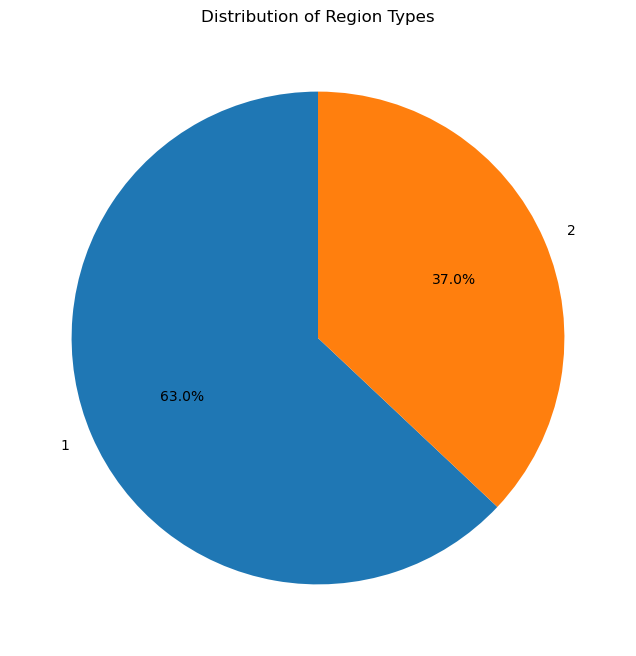

In [36]:
import matplotlib.pyplot as plt

# Visualizing Counts the in the Region_Type variable
region_type_counts = df_hs['REGION_TYPE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_type_counts, labels=region_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Region Types')
plt.show()

# 1 = Rural
# 2 = Urban

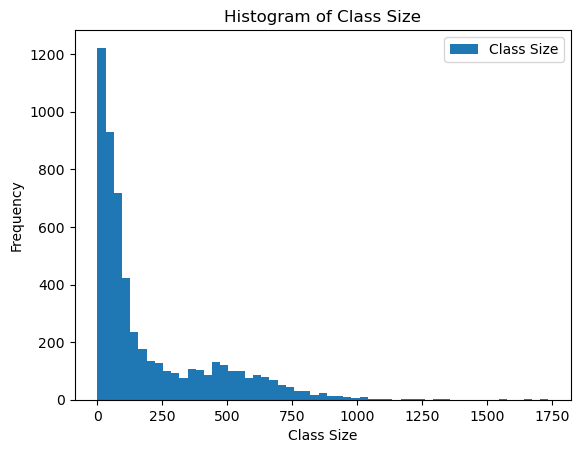

In [37]:
# Create the histogram for Class Size
plt.hist(df_hs.CAMP_ALLD, bins='auto', label='Class Size')  # 'auto' lets matplotlib decide the number of bins

# Adding labels and title
plt.xlabel('Class Size')
plt.ylabel('Frequency')
plt.title('Histogram of Class Size')

# Display the legend
plt.legend()

# Show the plot
plt.show()

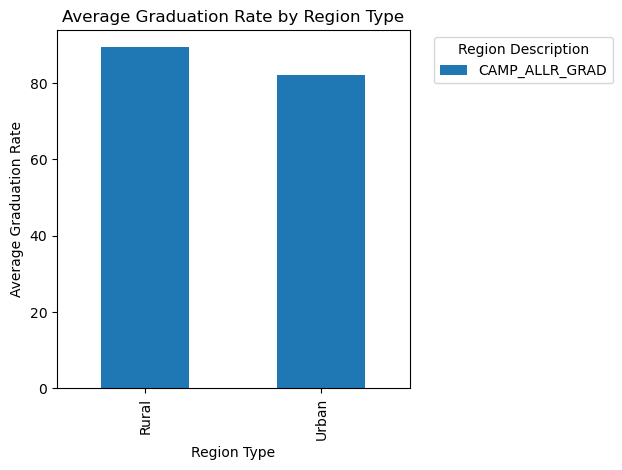

In [38]:
# Map 'REGION_TYPE' to 'Rural' and 'Urban'
region_mapping = {1: 'Rural', 2: 'Urban'}
df_hs['Region Name'] = df_hs['REGION_TYPE'].map(region_mapping)

# Calculate the average 'CAMP_ALLR_GRAD' for each 'Region Name'
grouped_averages = df_hs.groupby('Region Name')['CAMP_ALLR_GRAD'].mean()

# Plotting the bar graph
grouped_averages.plot(kind='bar')

# Adding labels and title
plt.xlabel('Region Type')
plt.ylabel('Average Graduation Rate')
plt.title('Average Graduation Rate by Region Type')

# Add legend with a bbox_to_anchor to move it outside of the plot area
plt.legend(title='Region Description', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()
